In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import math
%matplotlib inline


**Data Cleaning**

In [5]:
raw_data = pd.read_csv('NFLCombineData.csv')
raw_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
0,2015,Ameer Abdullah,Ameer,Abdullah,RB,5,9.0,69.0,205,0.0,...,6.79,42.5,130,24,0,Nebraska,0,0,0,5.9
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.00,0.0,0,12,0,USC,0,0,0,5.6
2,2015,Jay Ajayi,Jay,Ajayi,RB,6,0.0,72.0,221,0.0,...,7.10,39.0,121,19,0,Boise St.,0,0,0,6.0
3,2015,Kwon Alexander,Kwon,Alexander,OLB,6,1.0,73.0,227,0.0,...,7.14,36.0,121,24,0,LSU,0,0,0,5.4
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,6.64,34.0,121,13,0,West Virginia,0,0,0,5.3
5,2015,Javorius Allen,Javorius,Allen,RB,6,0.0,72.0,221,0.0,...,6.96,35.5,121,11,0,USC,0,0,0,5.3
6,2015,Adrian Amos,Adrian,Amos,FS,6,0.0,72.0,218,0.0,...,7.09,35.5,122,0,0,Penn St.,0,0,0,5.5
7,2015,Dres Anderson,Dres,Anderson,WR,6,1.0,73.0,187,0.0,...,0.00,0.0,0,13,0,Utah,0,0,0,5.5
8,2015,Henry Anderson,Henry,Anderson,DE,6,6.0,78.0,294,0.0,...,7.20,30.0,111,0,0,Stanford,0,0,0,5.6
9,2015,Rory 'Busta' Anderson,Rory 'Busta',Anderson,TE,6,5.0,77.0,244,0.0,...,0.00,0.0,0,0,0,South Carolina,0,0,0,5.5


In [6]:
raw_data['position'].unique()

array(['RB', 'WR', 'OLB', 'FS', 'DE', 'TE', 'ILB', 'DT', 'P', 'QB', 'OG',
       'OT', 'K', 'FB', 'SS', 'LS', 'CB', 'C', 'NT', 'OC'], dtype=object)

In [88]:
raw_data_no_outlier = raw_data.loc[raw_data['fortyyd'] > 0]
raw_data_no_outlier = raw_data_no_outlier.loc[raw_data['heightinchestotal'] > 0]
raw_data_no_outlier = raw_data_no_outlier.loc[raw_data['weight'] > 0]
raw_data_no_outlier = raw_data_no_outlier.loc[raw_data['bench'] > 0]

raw_data_no_outlier = raw_data_no_outlier.loc[raw_data['round'] > 0]

raw_data_no_outlier

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
320,2014,Jared Abbrederis,Jared,Abbrederis,WR,6,1.0,73.0,195,0.0,...,6.80,30.5,117,4,6,Wisconsin,16,176,0,5.2
321,2014,Davante Adams,Davante,Adams,WR,6,1.0,73.0,212,0.0,...,6.82,39.5,123,14,2,Fresno St.,21,53,0,6.0
323,2014,Ricardo Allen,Ricardo,Allen,CB,5,9.0,69.0,187,0.0,...,0.00,35.5,117,13,5,Purdue,19,147,0,5.1
324,2014,Jace Amaro,Jace,Amaro,TE,6,5.0,77.0,265,0.0,...,7.42,33.0,118,28,2,Texas Tech,17,49,0,5.4
326,2014,Dri Archer,Dri,Archer,RB,5,8.0,68.0,173,0.0,...,6.86,38.0,122,20,4,Kent St.,1,97,0,5.4
331,2014,Anthony Barr,Anthony,Barr,OLB,6,5.0,77.0,255,0.0,...,6.82,34.5,119,15,1,UCLA,9,9,0,6.6
332,2014,Lamin Barrow,Lamin,Barrow,OLB,6,1.0,73.0,237,0.0,...,7.24,35.0,123,22,5,LSU,28,156,0,5.4
333,2014,Odell Beckham,Odell,Beckham,WR,5,11.0,71.0,198,0.0,...,6.69,38.5,122,7,1,LSU,12,12,0,5.9
335,2014,Kelvin Benjamin,Kelvin,Benjamin,WR,6,5.0,77.0,240,0.0,...,7.33,32.5,119,13,1,Florida St.,28,28,0,6.4
336,2014,Bene Benwikere,Bene,Benwikere,CB,5,11.0,71.0,195,0.0,...,6.94,40.5,122,10,5,San Jose St.,20,148,0,5.2


In [89]:
position_data = raw_data_no_outlier.groupby(['position'])
position_data.apply(print)

     year             name firstname  lastname position  heightfeet  \
342  2014   Russell Bodine   Russell    Bodine        C           6   
551  2014  Matthew Paradis   Matthew   Paradis        C           6   
575  2014  Weston Richburg    Weston  Richburg        C           6   
613  2014   Travis Swanson    Travis   Swanson        C           6   

     heightinches  heightinchestotal  weight  arms  ...  threecone  vertical  \
342           3.0               75.0     310   0.0  ...       8.26      29.0   
551           3.0               75.0     306   0.0  ...       7.60      26.0   
575           3.0               75.0     298   0.0  ...       7.93      25.5   
613           5.0               77.0     312   0.0  ...       7.73      26.0   

     broad  bench  round         college  pickround  picktotal  wonderlic  \
342    109     42      4  North Carolina         15        111          0   
551    103     23      7       Boise St.         15        207          0   
575    106  

      year                name   firstname     lastname position  heightfeet  \
355   2014     Terrence Brooks    Terrence       Brooks       FS           5   
372   2014   Ha Ha Clinton-Dix       Ha Ha  Clinton-Dix       FS           6   
455   2014     Marqueston Huff  Marqueston         Huff       FS           5   
560   2014        Calvin Pryor      Calvin        Pryor       FS           5   
570   2014         Ed Reynolds          Ed     Reynolds       FS           6   
632   2014        Brock Vereen       Brock       Vereen       FS           6   
836   2013          Zeke Motta        Zeke        Motta       FS           6   
855   2013           Eric Reid        Eric         Reid       FS           6   
881   2013    Daimion Stafford     Daimion     Stafford       FS           6   
888   2013     D.J. Swearinger        D.J.   Swearinger       FS           5   
896   2013      Phillip Thomas     Phillip       Thomas       FS           6   
1071  2012        George Iloka      Geor

""


**RB Analysis**

In [90]:
rb_data = raw_data_no_outlier.loc[raw_data['position'] == 'RB']
rb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
326,2014,Dri Archer,Dri,Archer,RB,5,8.000,68.000,173,0.000,...,6.86,38.0,122,20,4,Kent St.,1,97,0,5.4
341,2014,Alfred Blue,Alfred,Blue,RB,6,2.000,74.000,223,0.000,...,7.15,32.0,121,13,6,LSU,21,181,0,5.2
366,2014,Ka'Deem Carey,Ka'Deem,Carey,RB,5,9.000,69.000,207,0.000,...,7.08,32.5,115,19,4,Arizona,21,117,0,5.8
448,2014,Jeremy Hill,Jeremy,Hill,RB,6,1.000,73.000,233,0.000,...,0.00,29.0,113,20,2,LSU,23,55,0,5.8
458,2014,Carlos Hyde,Carlos,Hyde,RB,6,0.000,72.000,230,0.000,...,0.00,34.5,114,19,2,Ohio St.,25,57,0,6.2
474,2014,Storm Johnson,Storm,Johnson,RB,6,0.000,72.000,209,0.000,...,0.00,35.5,118,16,7,Central Florida,30,222,0,5.3
527,2014,Jerick McKinnon,Jerick,McKinnon,RB,5,9.000,69.000,209,0.000,...,6.83,40.5,132,32,3,Georgia Southern,32,96,0,5.2
582,2014,Bishop Sankey,Bishop,Sankey,RB,5,9.000,69.000,209,0.000,...,6.75,35.5,126,26,2,Washington,22,54,0,5.3
587,2014,Lache Seastrunk,Lache,Seastrunk,RB,5,9.000,69.000,201,0.000,...,0.00,41.5,134,15,6,Baylor,26,186,0,5.3
592,2014,Charles Sims,Charles,Sims,RB,6,0.000,72.000,214,0.000,...,7.16,37.5,126,17,3,West Virginia,5,69,0,5.4


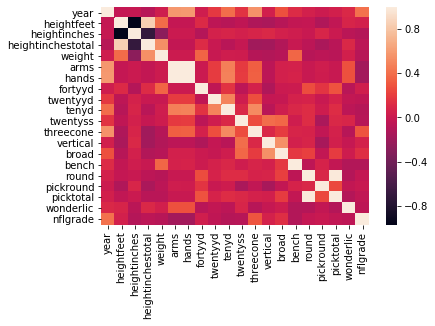

In [91]:
rb_corr = rb_data.corr()
sns.heatmap(rb_corr, 
        xticklabels=rb_corr.columns,
        yticklabels=rb_corr.columns)

In [92]:
rb_round_count = rb_data.groupby('round', as_index=False)['name'].count()
rb_round_count

,round,name
0,1,22
1,2,29
2,3,24
3,4,35
4,5,19
5,6,32
6,7,28


In [93]:
rb_round_height = rb_data.groupby('round', as_index=False)['heightinchestotal'].mean()
rb_round_height

,round,heightinchestotal
0,1,71.181818
1,2,71.103448
2,3,70.875000
3,4,70.571429
4,5,69.848684
5,6,71.046875
6,7,70.875000


Text(0.5, 0, 'Round')

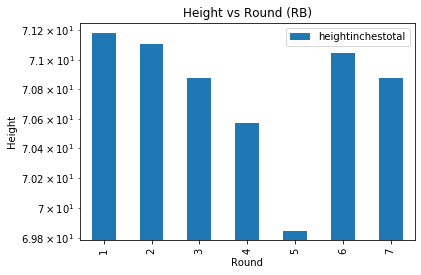

In [94]:
rb_round_height_plot = rb_round_height.plot(x = 'round', y = 'heightinchestotal', kind="bar", logy = True, title = "Height vs Round (RB)")
rb_round_height_plot.set_ylabel("Height")
rb_round_height_plot.set_xlabel("Round")

In [95]:
rb_round_weight = rb_data.groupby('round', as_index=False)['weight'].mean()
rb_round_weight

,round,weight
0,1,218.545455
1,2,218.310345
2,3,212.791667
3,4,212.685714
4,5,205.526316
5,6,215.625000
6,7,215.964286


Text(0.5, 0, 'Round')

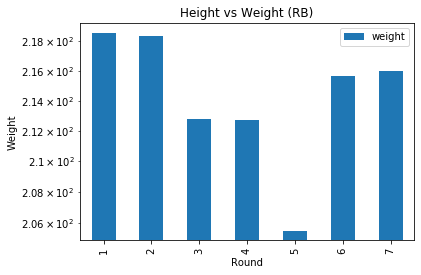

In [96]:
rb_round_weight_plot = rb_round_weight.plot(x = 'round', y = 'weight', kind="bar", logy = True, title = "Height vs Weight (RB)")
rb_round_weight_plot.set_ylabel("Weight")
rb_round_weight_plot.set_xlabel("Round")

In [97]:
rb_round_forty = rb_data.groupby('round', as_index=False)['fortyyd'].mean()
rb_round_forty

,round,fortyyd
0,1,4.463182
1,2,4.528276
2,3,4.505833
3,4,4.522857
4,5,4.532105
5,6,4.552500
6,7,4.575000


Text(0.5, 0, 'Round')

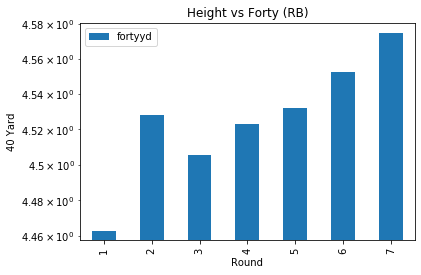

In [98]:
rb_round_forty_plot = rb_round_forty.plot(x = 'round', y = 'fortyyd', kind="bar", logy = True, title = "Height vs Forty (RB)")
rb_round_forty_plot.set_ylabel("40 Yard")
rb_round_forty_plot.set_xlabel("Round")

In [60]:
rb_round_cone = rb_data.groupby('round', as_index=False)['threecone'].mean()
rb_round_cone

,round,threecone
0,1,0.399412
1,2,1.459286
2,3,1.218261
3,4,0.902903
4,5,2.195263
5,6,1.575161
6,7,1.081481


Text(0.5, 0, 'Round')

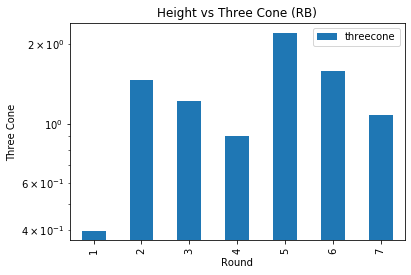

In [61]:
rb_round_cone_plot = rb_round_cone.plot(x = 'round', y = 'threecone', kind="bar", logy = True, title = "Height vs Three Cone (RB)")
rb_round_cone_plot.set_ylabel("Three Cone")
rb_round_cone_plot.set_xlabel("Round")

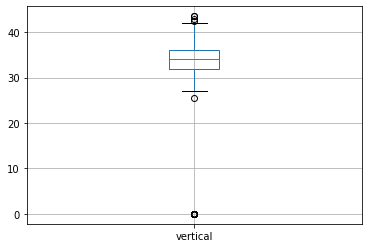

In [11]:
rb_data.boxplot(column=['vertical'])

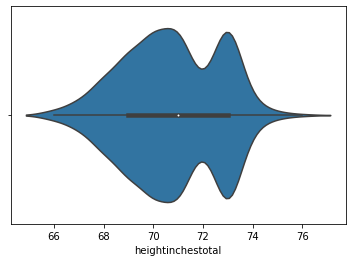

In [12]:
sns.violinplot(x=rb_data["heightinchestotal"])

In [13]:
fb_data = raw_data.loc[raw_data['position'] == 'FB']
fb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
36,2015,Michael Burton,Michael,Burton,FB,5,11.0,71.0,242,0.000,...,7.20,33.0,115,25,0,Rutgers,0,0,0,4.8
107,2015,Jalston Fowler,Jalston,Fowler,FB,5,11.0,71.0,254,0.000,...,7.56,33.5,114,23,0,Alabama,0,0,0,5.1
295,2015,Tyler Varga,Tyler,Varga,FB,5,11.0,71.0,222,0.000,...,0.00,0.0,0,23,0,Yale,0,0,0,5.2
381,2014,J.C. Copeland,J.C.,Copeland,FB,5,11.0,71.0,271,0.000,...,7.68,28.5,111,23,0,LSU,0,0,0,5.1
447,2014,Ryan Hewitt,Ryan,Hewitt,FB,6,4.0,76.0,246,0.000,...,7.04,33.0,109,0,0,Stanford,0,0,0,5.0
530,2014,Trey Millard,Trey,Millard,FB,6,2.0,74.0,247,0.000,...,0.00,0.0,0,0,8,Oklahoma,21,245,0,5.1
1304,2011,Shaun Chapas,Shaun,Chapas,FB,6,2.0,74.0,247,32.000,...,0.00,35.5,116,23,7,Georgia,17,220,0,0.0
1307,2011,Charles Clay,Charles,Clay,FB,6,3.0,75.0,245,33.000,...,0.00,33.5,118,18,6,Tulsa,9,174,0,0.0
1381,2011,Henry Hynoski,Henry,Hynoski,FB,6,1.0,73.0,257,31.375,...,0.00,30.5,111,24,0,NaN,0,0,0,0.0
1422,2011,Owen Marecic,Owen,Marecic,FB,6,1.0,73.0,248,32.625,...,0.00,28.5,102,22,4,Stanford,27,124,0,0.0


In [14]:
wr_data = raw_data.loc[raw_data['position'] == 'WR']
wr_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
1,2015,Nelson Agholor,Nelson,Agholor,WR,6,0.0,72.0,198,0.0,...,0.00,0.0,0,12,0,USC,0,0,0,5.6
4,2015,Mario Alford,Mario,Alford,WR,5,8.0,68.0,180,0.0,...,6.64,34.0,121,13,0,West Virginia,0,0,0,5.3
7,2015,Dres Anderson,Dres,Anderson,WR,6,1.0,73.0,187,0.0,...,0.00,0.0,0,13,0,Utah,0,0,0,5.5
18,2015,Kenny Bell,Kenny,Bell,WR,6,1.0,73.0,197,0.0,...,6.66,41.5,129,7,0,Nebraska,0,0,0,5.4
30,2015,Da'Ron Brown,Da'Ron,Brown,WR,6,0.0,72.0,205,0.0,...,7.04,37.0,120,17,0,Northern Illinois,0,0,0,4.9
48,2015,Kaelin Clay,Kaelin,Clay,WR,5,10.0,70.0,195,0.0,...,6.97,33.0,113,10,0,Utah,0,0,0,5.1
51,2015,Sammie Coates,Sammie,Coates,WR,6,1.0,73.0,212,0.0,...,6.98,41.0,131,23,0,Auburn,0,0,0,5.6
59,2015,Chris Conley,Chris,Conley,WR,6,2.0,74.0,213,0.0,...,7.06,45.0,139,18,0,Georgia,0,0,0,5.5
60,2015,Amari Cooper,Amari,Cooper,WR,6,1.0,73.0,211,0.0,...,6.71,33.0,120,0,0,Alabama,0,0,0,7.0
67,2015,Jamison Crowder,Jamison,Crowder,WR,5,8.0,68.0,185,0.0,...,7.17,37.0,115,10,0,Duke,0,0,0,5.4


In [15]:
te_data = raw_data.loc[raw_data['position'] == 'TE']
te_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
9,2015,Rory 'Busta' Anderson,Rory 'Busta',Anderson,TE,6,5.0,77.0,244,0.0,...,0.00,0.0,0,0,0,South Carolina,0,0,0,5.5
17,2015,Blake Bell,Blake,Bell,TE,6,6.0,78.0,252,0.0,...,0.00,33.0,116,14,0,Oklahoma,0,0,0,5.2
21,2015,E.J. Bibbs,E.J.,Bibbs,TE,6,2.0,74.0,258,0.0,...,0.00,0.0,0,20,0,Iowa St.,0,0,0,5.0
27,2015,Nick Boyle,Nick,Boyle,TE,6,4.0,76.0,268,0.0,...,0.00,30.5,112,20,0,Delaware,0,0,0,5.2
45,2015,Gerald Christian,Gerald,Christian,TE,6,3.0,75.0,244,0.0,...,0.00,0.0,0,28,0,Louisville,0,0,0,5.3
49,2015,Cameron Clear,Cameron,Clear,TE,6,5.0,77.0,277,0.0,...,0.00,32.0,108,0,0,Texas A&M,0,0,0,4.8
81,2015,A.J. Derby,A.J.,Derby,TE,6,4.0,76.0,255,0.0,...,0.00,0.0,0,15,0,Arkansas,0,0,0,5.3
150,2015,Jeff Heuerman,Jeff,Heuerman,TE,6,5.0,77.0,254,0.0,...,0.00,0.0,0,26,0,Ohio St.,0,0,0,5.4
164,2015,Jesse James,Jesse,James,TE,6,7.0,79.0,261,0.0,...,0.00,37.5,121,26,0,Penn St.,0,0,0,5.1
180,2015,Ben Koyack,Ben,Koyack,TE,6,5.0,77.0,255,0.0,...,0.00,0.0,0,0,0,Notre Dame,0,0,0,5.4


In [16]:
cb_data = raw_data.loc[raw_data['position'] == 'CB']
cb_data

,year,name,firstname,lastname,position,heightfeet,heightinches,heightinchestotal,weight,arms,...,threecone,vertical,broad,bench,round,college,pickround,picktotal,wonderlic,nflgrade
41,2015,Alex Carter,Alex,Carter,CB,6,0.0,72.0,196,0.0,...,7.05,40.0,121,17,0,Stanford,0,0,0,5.5
43,2015,Donald Celiscar,Donald,Celiscar,CB,5,11.0,71.0,194,0.0,...,0.00,0.0,120,0,0,Western Michigan,0,0,0,5.3
54,2015,Justin Coleman,Justin,Coleman,CB,5,11.0,71.0,185,0.0,...,6.61,37.5,124,20,0,Tennessee,0,0,0,5.2
56,2015,Jalen Collins,Jalen,Collins,CB,6,1.0,73.0,203,0.0,...,6.77,36.0,124,0,0,LSU,0,0,0,6.1
70,2015,Ronald Darby,Ronald,Darby,CB,5,11.0,71.0,193,0.0,...,6.94,41.5,129,12,0,Florida St.,0,0,0,5.6
83,2015,Quandre Diggs,Quandre,Diggs,CB,5,9.0,69.0,196,0.0,...,7.22,35.5,113,17,0,Texas,0,0,0,5.2
88,2015,Lorenzo Doss,Lorenzo,Doss,CB,5,10.0,70.0,182,0.0,...,7.20,33.5,115,9,0,Tulane,0,0,0,5.6
95,2015,Ifo Ekpre-Olomu,Ifo,Ekpre-Olomu,CB,5,9.0,69.0,192,0.0,...,0.00,0.0,0,0,0,Oregon,0,0,0,5.6
110,2015,Charles Gaines,Charles,Gaines,CB,5,10.0,70.0,180,0.0,...,7.07,34.5,123,0,0,Louisville,0,0,0,5.5
115,2015,Jacoby Glenn,Jacoby,Glenn,CB,6,0.0,72.0,179,0.0,...,6.97,34.0,123,0,0,Central Florida,0,0,0,5.2
